In [1]:
#import required library
#These lines import the required Python libraries for our analysis:
#pandas is a library for data manipulation and analysis, used for reading the CSV file and handling the data.
#numpy is a library for numerical computing, used for working with arrays and matrices.
#sklearn.linear_model is a module from the scikit-learn library that provides the LinearRegression model.
#sklearn.model_selection is a module from scikit-learn that provides utilities for splitting the data into training and test sets.
#matplotlib.pyplot is a module from the Matplotlib library for creating plots and visualizations.
#sklearn.metrics is a module from scikit-learn that provides various evaluation metrics for assessing the performance of the model.

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


In [2]:
#This line reads the data from the test_csv.csv file using the read_csv function from the pandas library and stores it in the data variable as a pandas DataFrame.

stock_price = pd.read_csv("test_csv.csv")

In [3]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dates           1043 non-null   object 
 1   BARC LN Equity  1043 non-null   float64
dtypes: float64(1), object(1)
memory usage: 12.3+ KB


In [4]:
# Convert the date column to datetime format
#This line converts the 'Dates' column in the DataFrame from string format to datetime format using the to_datetime function from pandas. 
#The format='%d/%m/%Y' argument specifies that the dates are in the 'DD/MM/YYYY' format.

stock_price['Dates'] = pd.to_datetime(stock_price['Dates'], format='%d/%m/%Y')

In [5]:
stock_price.head(10)

,Dates,BARC LN Equity
0,2020-01-01,1.796
1,2020-01-02,1.852
2,2020-01-03,1.833
3,2020-01-06,1.810
4,2020-01-07,1.831
5,2020-01-08,1.820
6,2020-01-09,1.829
7,2020-01-10,1.810
8,2020-01-13,1.817
9,2020-01-14,1.810


In [6]:
# Set the date column as the index
#This line sets the 'Dates' column as the index of the DataFrame using the set_index method from pandas.

stock_price = stock_price.set_index('Dates')

In [7]:
# Convert the datetime index to a numerical representation (number of days since a reference date)
reference_date = stock_price.index.min()
X = (stock_price.index - reference_date).days.values.reshape(-1, 1)

These lines convert the datetime index to a numerical representation by computing the number of days elapsed since a reference date (the earliest date in the index). The reference_date variable stores the earliest date from the index using data.index.min(). Then, the number of days elapsed since this reference date is calculated for each date in the index using the days attribute of the TimedeltaIndex object obtained by subtracting reference_date from data.index. The resulting array is stored in the X variable, which represents the feature matrix. The values attribute is used to convert the pandas Series to a numpy array, and reshape(-1, 1) reshapes the array to have a single column.

In [8]:
# Target variable
#This line assigns the 'BARC LN Equity' column from the DataFrame to the y variable, which represents the target variable (stock prices). 
#The values attribute is used to convert the pandas Series to a numpy array.

y = stock_price['BARC LN Equity'].values

In [9]:
# Split the data into training and test sets
#This line splits the data into training and test sets using the train_test_split function from scikit-learn. 
#The X and y variables contain the feature matrix and target variable, respectively. 
#The test_size=0.2 argument specifies that 20% of the data should be used for testing, and the remaining 80% for training. 
#The random_state=42 argument ensures reproducibility by setting a fixed seed for the random number generator.
#The function returns four variables: X_train, X_test, y_train, and y_test, which contain the feature matrices and target variables for the training and test sets, respectively.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [10]:
# Split the data into train, validation, and test sets
#These lines create an instance of the LinearRegression model from scikit-learn and fit the model to the training data (X_train, y_train) using the fit method.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [11]:
# Create and fit the linear regression model
#These lines create an instance of the LinearRegression model from scikit-learn and fit the model to the training data (X_train, y_train) using the fit method.

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Make predictions on the training, validation, and test sets
#These lines use the fitted linear regression model to make predictions on the training and test sets using the predict method. 
#The predicted values for the training set are stored in y_train_pred, and the predicted values for the test set are stored in y_test_pred.

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)


In [13]:
# Calculate evaluation metrics on the training set
#These lines calculate various evaluation metrics for assessing the performance of the linear regression model on both the training and test sets. The metrics calculated are:
#r2_score: R-squared score, which measures how well the model fits the data (ranges from 0 to 1, with 1 being a perfect fit).
#explained_variance_score: Explained variance score, which represents the proportion of variance in the target variable that is explained by the model.
#mean_absolute_percentage_error: Mean Absolute Percentage Error (MAPE), which measures the average absolute percentage difference between the predicted and actual values.
#mean_squared_error: Mean Squared Error (MSE), which measures the average squared difference between the predicted and actual values.
#np.sqrt(mse): Root Mean Squared Error (RMSE), which is the square root of the MSE and provides a measure of the typical magnitude of the prediction errors.
#mean_absolute_error: Mean Absolute Error (MAE), which measures the average absolute difference between the predicted and actual values.
#Each metric is calculated separately for the training and test sets using the corresponding functions from the sklearn.metrics module.



r2_train = r2_score(y_train, y_train_pred)
explained_variance_train = explained_variance_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
mae_train = mean_absolute_error(y_train, y_train_pred)


# Calculate evaluation metrics on the validation set
r2_val = r2_score(y_val, y_val_pred)
explained_variance_val = explained_variance_score(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = mse_val ** 0.5
mae_val = mean_absolute_error(y_val, y_val_pred)


# Calculate evaluation metrics on the test set
r2_test = r2_score(y_test, y_test_pred)
explained_variance_test = explained_variance_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)

In [14]:
#These lines print the calculated evaluation metrics for both the training and test sets. The f-strings are used to format the output with the metric names and values.



print("Training Set Metrics:")
print(f"\nR-squared: {r2_train:.2f}")
print(f"Explained Variation: {explained_variance_train:.2f}")
print(f"MAPE: {mape_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"MAE: {mae_train:.2f}")


print("\nValidation Set Metrics:")
print(f"\nR-squared: {r2_val:.2f}")
print(f"Explained Variation: {explained_variance_val:.2f}")
print(f"MAPE: {mape_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"MAE: {mae_val:.2f}")


print("\nTest Set Metrics:")

print(f"\nR-squared: {r2_test:.2f}")
print(f"Explained Variation: {explained_variance_test:.2f}")
print(f"MAPE: {mape_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")

Training Set Metrics:

R-squared: 0.06
Explained Variation: 0.06
MAPE: 0.15
MSE: 0.07
RMSE: 0.26
MAE: 0.22

Validation Set Metrics:

R-squared: 0.11
Explained Variation: 0.11
MAPE: 0.17
MSE: 0.08
RMSE: 0.28
MAE: 0.24

Test Set Metrics:

R-squared: 0.09
Explained Variation: 0.09
MAPE: 0.17
MSE: 0.08
RMSE: 0.28
MAE: 0.23


These lines print the calculated evaluation metrics for both the training and test sets. The f-strings are used to format the output with the metric names and values.



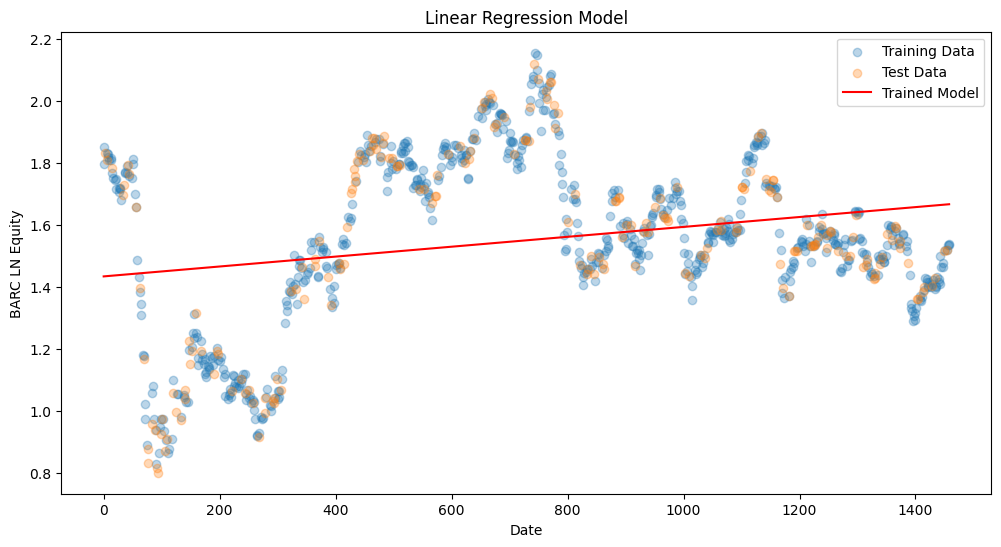

In [17]:
# Plot the training and test data with the trained model
#These lines create a plot using Matplotlib to visualize the training and test data along with the trained linear regression model:

#plt.figure(figsize=(12, 6)) creates a new figure with a specific size (12 inches wide and 6 inches tall).
#plt.scatter(X_train, y_train, label='Training Data', alpha=0.3) plots the training data as scattered points, with a label and transparency level (alpha=0.3).
#plt.scatter(X_test, y_test, label='Test Data', alpha=0.3) plots the test data as scattered points, with a label and transparency level (alpha=0.3).
#plt.plot(X, model.predict(X), 'r', label='Trained Model') plots the trained linear regression model as a red line, using the predict method to obtain the predicted values for the entire feature matrix X.
#plt.xlabel('Date') and plt.ylabel('BARC LN Equity') set the labels for the x-axis and y-axis, respectively.
#plt.title('Linear Regression Model') sets the title of the plot.
#plt.legend() adds a legend to the plot, displaying the labels for the training data, test data, and trained model.
#plt.show() displays the plot.
#This plot allows you to visually assess how well the trained linear regression model fits the training and test data.




plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, label='Training Data', alpha=0.3)
plt.scatter(X_test, y_test, label='Test Data', alpha=0.3)
plt.plot(X, model.predict(X), 'r', label='Trained Model')
plt.xlabel('Date')
plt.ylabel('BARC LN Equity')
plt.title('Linear Regression Model')
plt.legend()
plt.show()